# Setup

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from simple_segment import segment, fit
import matplotlib

# Neelesh's Data
### Overview of Data

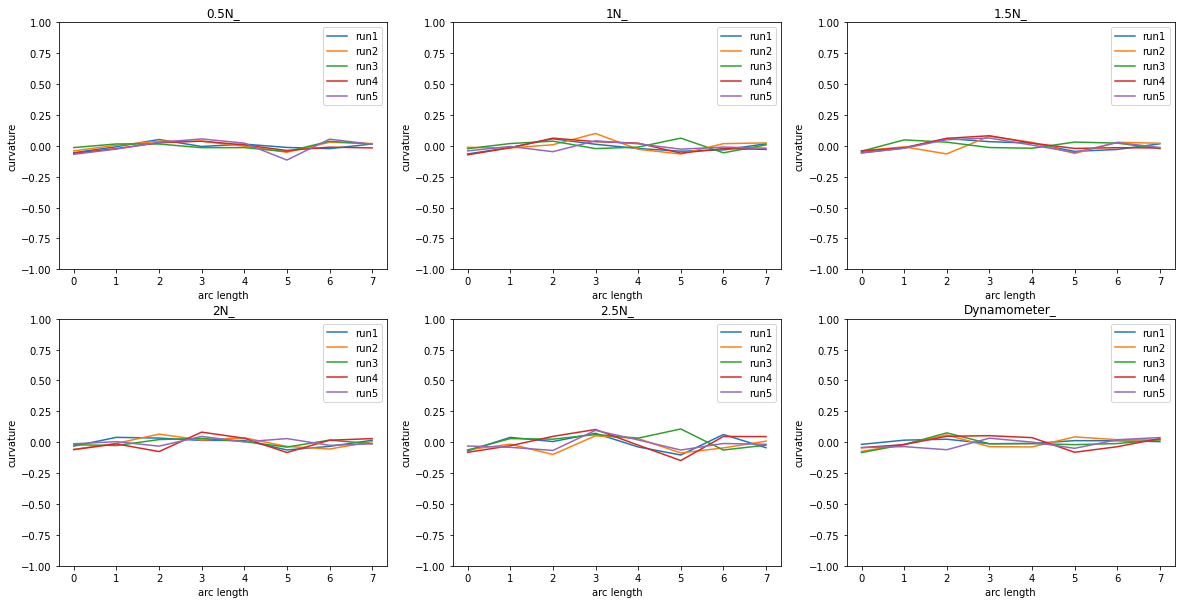

In [2]:
folder = "Neelesh_Data/"
force_string = ["0.5N_","1N_","1.5N_","2N_","2.5N_","Dynamometer_"]
run_string = ["run1","run2","run3","run4","run5"]

plt.figure(figsize=(20,10))

for force_ind in range(len(force_string)):
    plt.subplot(2,3,force_ind+1)
    plt.title(force_string[force_ind])
    for run in run_string:

        file = folder + force_string[force_ind] + run + ".json"

        with open(file,"r") as json_file:
            data = json.load(json_file)

        exp_params = data["experiment_parameters"]
        data = data["data"]

        curvatures = data[0]['curvatures']

        plt.plot(curvatures[10:18])
        plt.xlabel('arc length')
        plt.ylabel('curvature')
        plt.legend(run_string)
        plt.ylim((-1,1));

[(0, -0.030549522732677394, 2, -0.06638289479786637), (2, -0.06638289479786637, 3, 0.09633887866236794), (3, 0.09633887866236794, 5, -0.06301460591903532), (5, -0.06301460591903532, 7, -0.01622639740606967)]
4


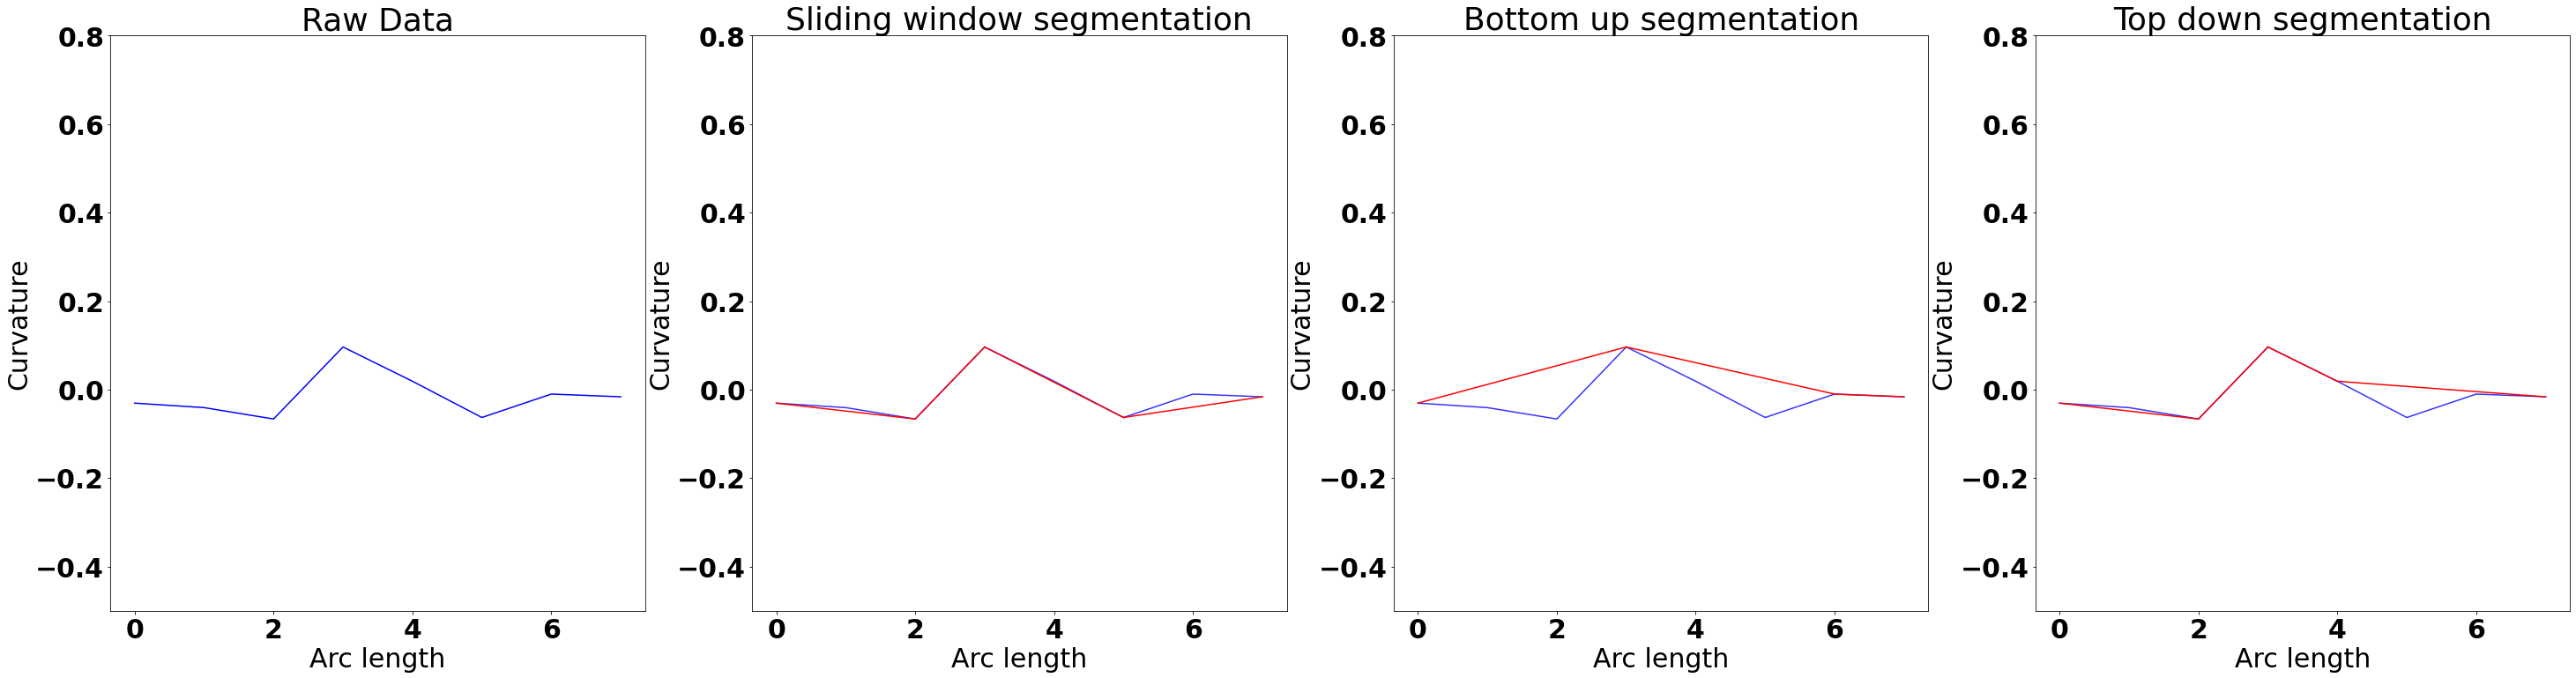

In [3]:
with open("Neelesh_Data/2.5N_run5.json") as json_file:
    data = json.load(json_file)

data = data["data"]

curvatures = data[0]['curvatures'][10:18]

max_error = 0.005

font = {'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

fig=plt.figure(figsize=(50,12))

plt.subplot(1,4,1)
plt.plot(curvatures,'b')
plt.xlabel('Arc length')
plt.ylabel('Curvature')
plt.title('Raw Data')
plt.ylim((-0.5,0.8));

xtick = [0,1,2,3,4,5,6,7,8]

plt.subplot(1,4,2)
segments = segment.slidingwindowsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Sliding window segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

print(segments)
print(len(segments))

plt.subplot(1,4,3)
segments = segment.bottomupsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Bottom up segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

plt.subplot(1,4,4)
segments = segment.topdownsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Top down segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));